In [1]:
import pickle
import pandas as pd
from tqdm import tqdm

In [2]:
with open('email_campaigns.pkl','rb') as f:
    data = pickle.load(f)

In [3]:
data[16]

{'MarketingAnalyticsSeries': [{'subject': '🚀 Boost Your Marketing ROI with Advanced Analytics!',
   'body': "Hello [Recipient's Name],\n\nAre you harnessing the full power of your marketing data? With [Your Company]'s advanced analytics services, you can amplify your marketing ROI and get granular insights into customer behavior.\n\nLet's dig into your data together! 👩\u200d💻 Click here [meeting link] to book a strategy session. Can I reserve a spot for you this week?\n\nBest,\n[Your Name]",
   'opened': True,
   'meeting link clicked': False,
   'responded': False},
  {'subject': "Re: Personalized Insights for [Recipient's Company] Marketing Strategy 📊",
   'body': "Hi [Recipient's Name],\n\nI noticed you checked out our email about supercharging your marketing efforts with analytics but haven't booked a session yet. We've helped companies like yours increase campaign conversion rates by up to 25%!\n\nLet's explore what [Your Company]'s analytics can do for you. Here’s the [meeting li

In [4]:
cols = ['thread_id','subject','body','email_num','previous_opened','opened','meeting_link_clicked','responded']
df_data = []
k = 0
for row in tqdm(data):
    
    
    for thread in row.values():
        prev_opened = False
        for i,msg in enumerate(thread):
            if type(msg) == dict:
                thread_num = k
                sub = msg['subject']
                body = msg['body']
                email_num = i+1 # Number of Email sent for that thread
                opened = msg['opened']
                try:
                    mlc = msg['meeting link clicked']
                except:
                    mlc = msg['meeting_link_clicked']
                resp = msg['responded']
                df_data.append([k,sub,body,email_num,prev_opened,opened,mlc,resp])
                prev_opened = opened
        k += 1

df = pd.DataFrame(data = df_data, columns= cols)
df.head()

100%|██████████| 52/52 [00:00<00:00, 79051.76it/s]


,thread_id,subject,body,email_num,previous_opened,opened,meeting_link_clicked,responded
0,0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",1,False,False,False,False
1,0,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",2,False,True,False,False
2,0,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",3,True,False,False,False
3,0,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",4,False,True,True,False
4,1,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",1,False,False,False,False


In [5]:
df[(df['opened'] == True) & (df['previous_opened'] == False)].drop_duplicates(subset='thread_id').head()

,thread_id,subject,body,email_num,previous_opened,opened,meeting_link_clicked,responded
1,0,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",2,False,True,False,False
5,1,Turn Data into Decisions 📊 - Your Next Competi...,"Hey [Recipient's Name],\n\nI saw that my previ...",2,False,True,False,False
9,2,Your Marketing Strategy Deserves the Best Anal...,"Hello [Recipient's Name],\n\nImprove your mark...",2,False,True,False,False
11,3,💡 Elevate Your Marketing with Actionable Insig...,"Hi [Recipient's Name],\n\nAre you leveraging y...",1,False,True,False,False
14,4,🚀 Propel Your Marketing with Data-Driven Insights,"Hello [Recipient's Name],\n\nAre you harnessin...",1,False,True,False,False


#### Finding out on an average how many emails it takes for a user to open and view it

In [6]:
import matplotlib.pyplot as plt
grp = df[(df['opened'] == True) & (df['previous_opened'] == False)].drop_duplicates(
    subset='thread_id',
).groupby('email_num')['opened'].count()
grp = grp/53 * 100
grp

email_num
1    69.811321
2    30.188679
Name: opened, dtype: float64

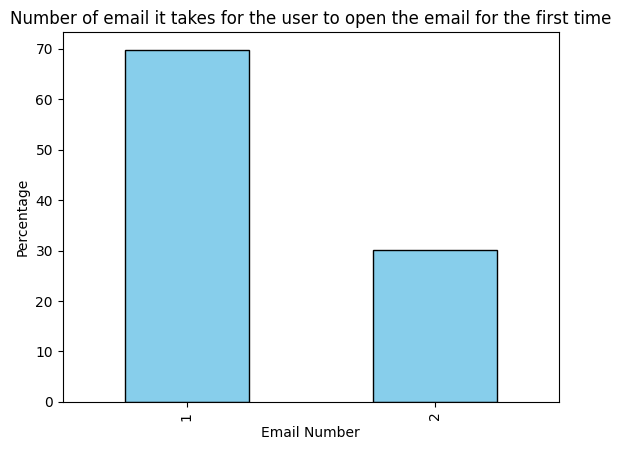

In [7]:
grp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of email it takes for the user to open the email for the first time')
plt.xlabel('Email Number')
plt.ylabel('Percentage')
plt.show()

So ~70% of the people view the first email send to them, as the subject line is the reason one would open the email, let's see why for the reaming 30% it took more than one email.

In [8]:
df_sub = df[(df['opened'] == True) & (df['previous_opened'] == False)].drop_duplicates(subset='thread_id')[['subject','email_num']]

In [10]:
import nltk
from nltk.corpus import stopwords
import demoji

def remove_emojis_and_stopwords(subject_line):
    # Remove emojis
    subject_line_no_emojis = demoji.replace(subject_line, repl="")

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = subject_line_no_emojis.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_subject_line = ' '.join(filtered_words)

    return filtered_subject_line


In [11]:
df_sub['subject'] = df_sub['subject'].apply(func=remove_emojis_and_stopwords)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/debal/nltk_data'
    - '/Users/debal/miniconda3/envs/nlp/nltk_data'
    - '/Users/debal/miniconda3/envs/nlp/share/nltk_data'
    - '/Users/debal/miniconda3/envs/nlp/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['subject'])
y = df['email_num']

In [12]:
classifier = MultinomialNB()
classifier.fit(X, y)

MultinomialNB()

In [ ]:
classifier.feature_log_prob_

/var/folders/14/5271m2p52j53fmw7g_84t3740000gn/T/ipykernel_14601/581354146.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Log Probability', y='Feature', data=top_features, palette='viridis')


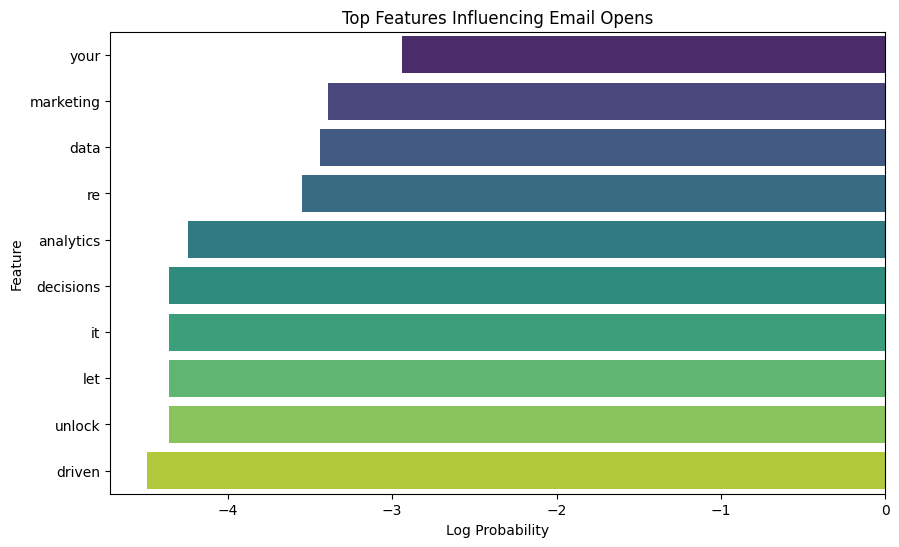

In [14]:
features = vectorizer.get_feature_names_out()
log_prob = classifier.feature_log_prob_[1]  # Log probabilities for the 'Opened' class
coef_df = pd.DataFrame({'Feature': features, 'Log Probability': log_prob})
top_features = coef_df.nlargest(10, 'Log Probability')

plt.figure(figsize=(10, 6))
sns.barplot(x='Log Probability', y='Feature', data=top_features, palette='viridis')
plt.title('Top Features Influencing Email Opens')
plt.xlabel('Log Probability')
plt.ylabel('Feature')
plt.show()